In [33]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt       
import seaborn as sns  

In [34]:
titanic = pd.read_csv('titanic.csv')

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S


In [37]:
titanic.shape

(891, 12)

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data set Data set description
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [39]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
# Handling null value
titanic.drop('Cabin',axis=1,inplace=True)
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

C:\Users\EGYPT_LAPTOP\AppData\Local\Temp\ipykernel_9640\2269611326.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
C:\Users\EGYPT_LAPTOP\AppData\Local\Temp\ipykernel_9640\2269611326.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Drop unnecessary colums
titanic.drop('Ticket',axis='columns',inplace=True)
titanic.drop('Name',axis='columns',inplace=True)

In [44]:
print(titanic.duplicated().sum())

0


<Figure size 1600x1600 with 0 Axes>

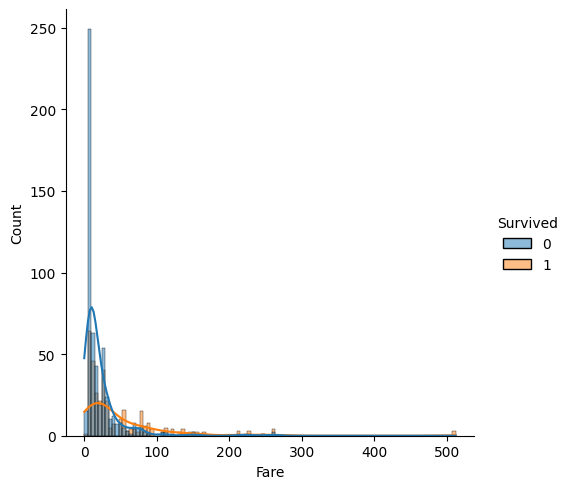

<Figure size 1600x1600 with 0 Axes>

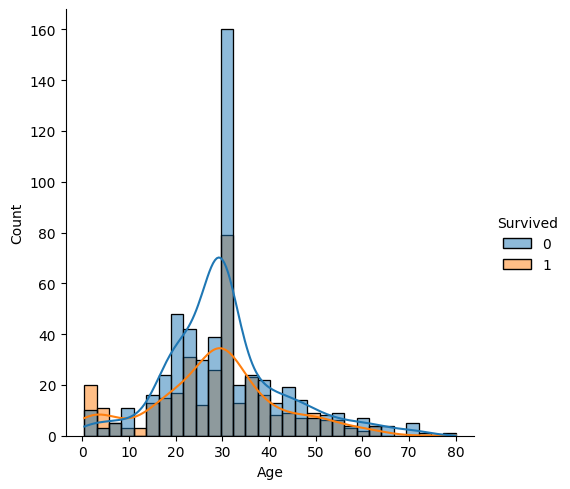

In [45]:
# continous data distrubition 
continous=['Fare','Age']
for xd in continous :
    plt.figure(figsize=(16,16))
    sns.displot(data=titanic,x=xd,kde=True,hue='Survived')


Most fares were between $0 and $100. 💰
The majority of passengers paid fares within this range.
Survival rates may vary depending on ticket class (higher fares → first class → higher survival probability).

Most ages were between 20 and 50 years. 👨‍👩‍👧
The majority of passengers fell within this age range.
This means both survivors and non-survivors were concentrated in this group.

This age and fare range had the highest number of survivors and non-survivors. 🚢
Since most passengers were within these ranges, it is expected that both survival and non-survival counts were highest here.
However, deeper analysis (e.g., survival rate) can reveal whether specific subgroups had a higher survival probability.

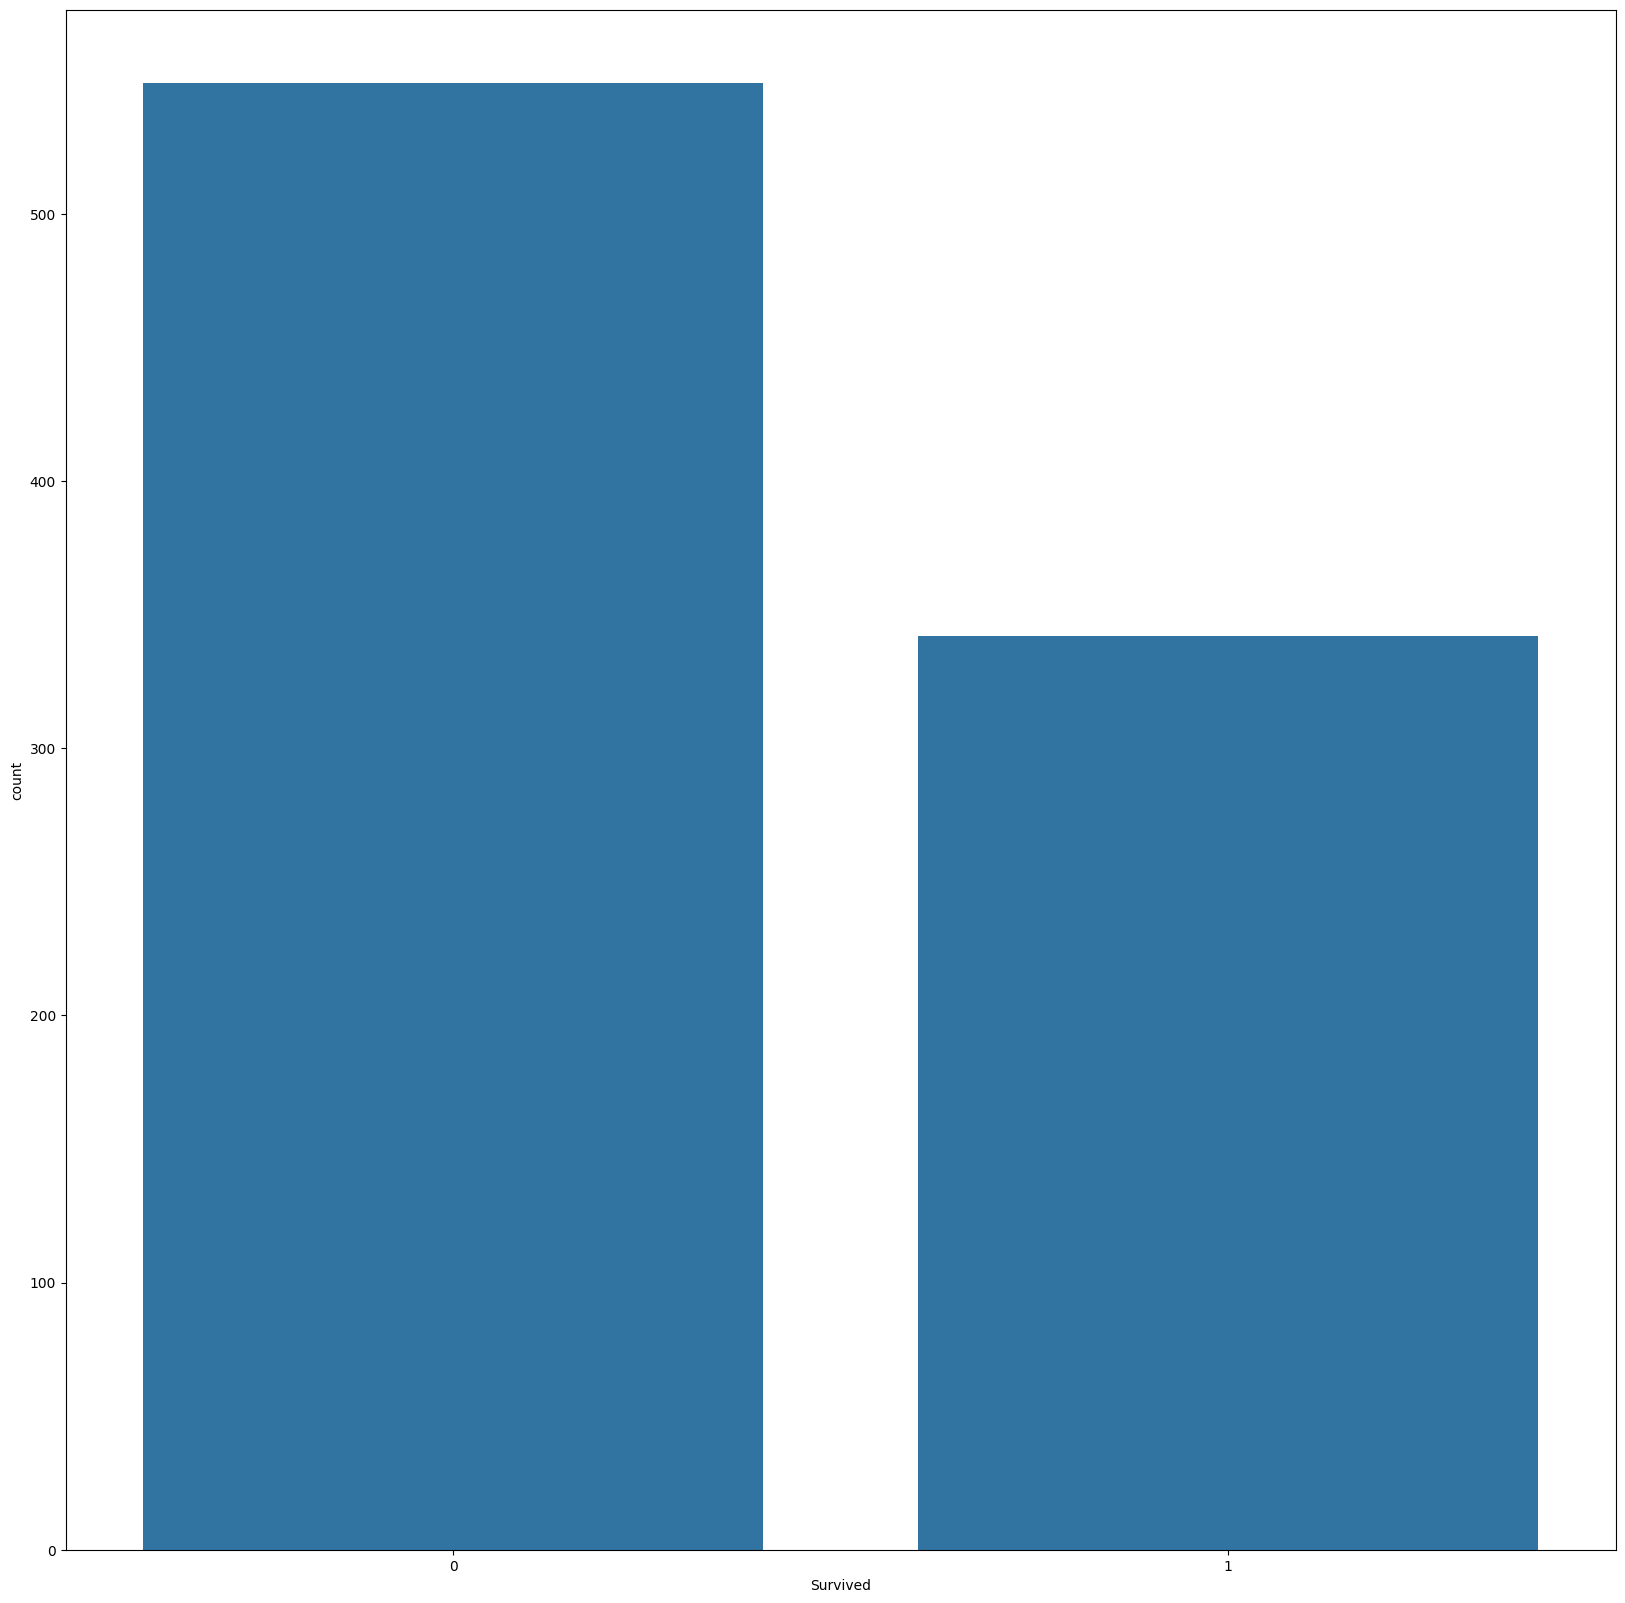

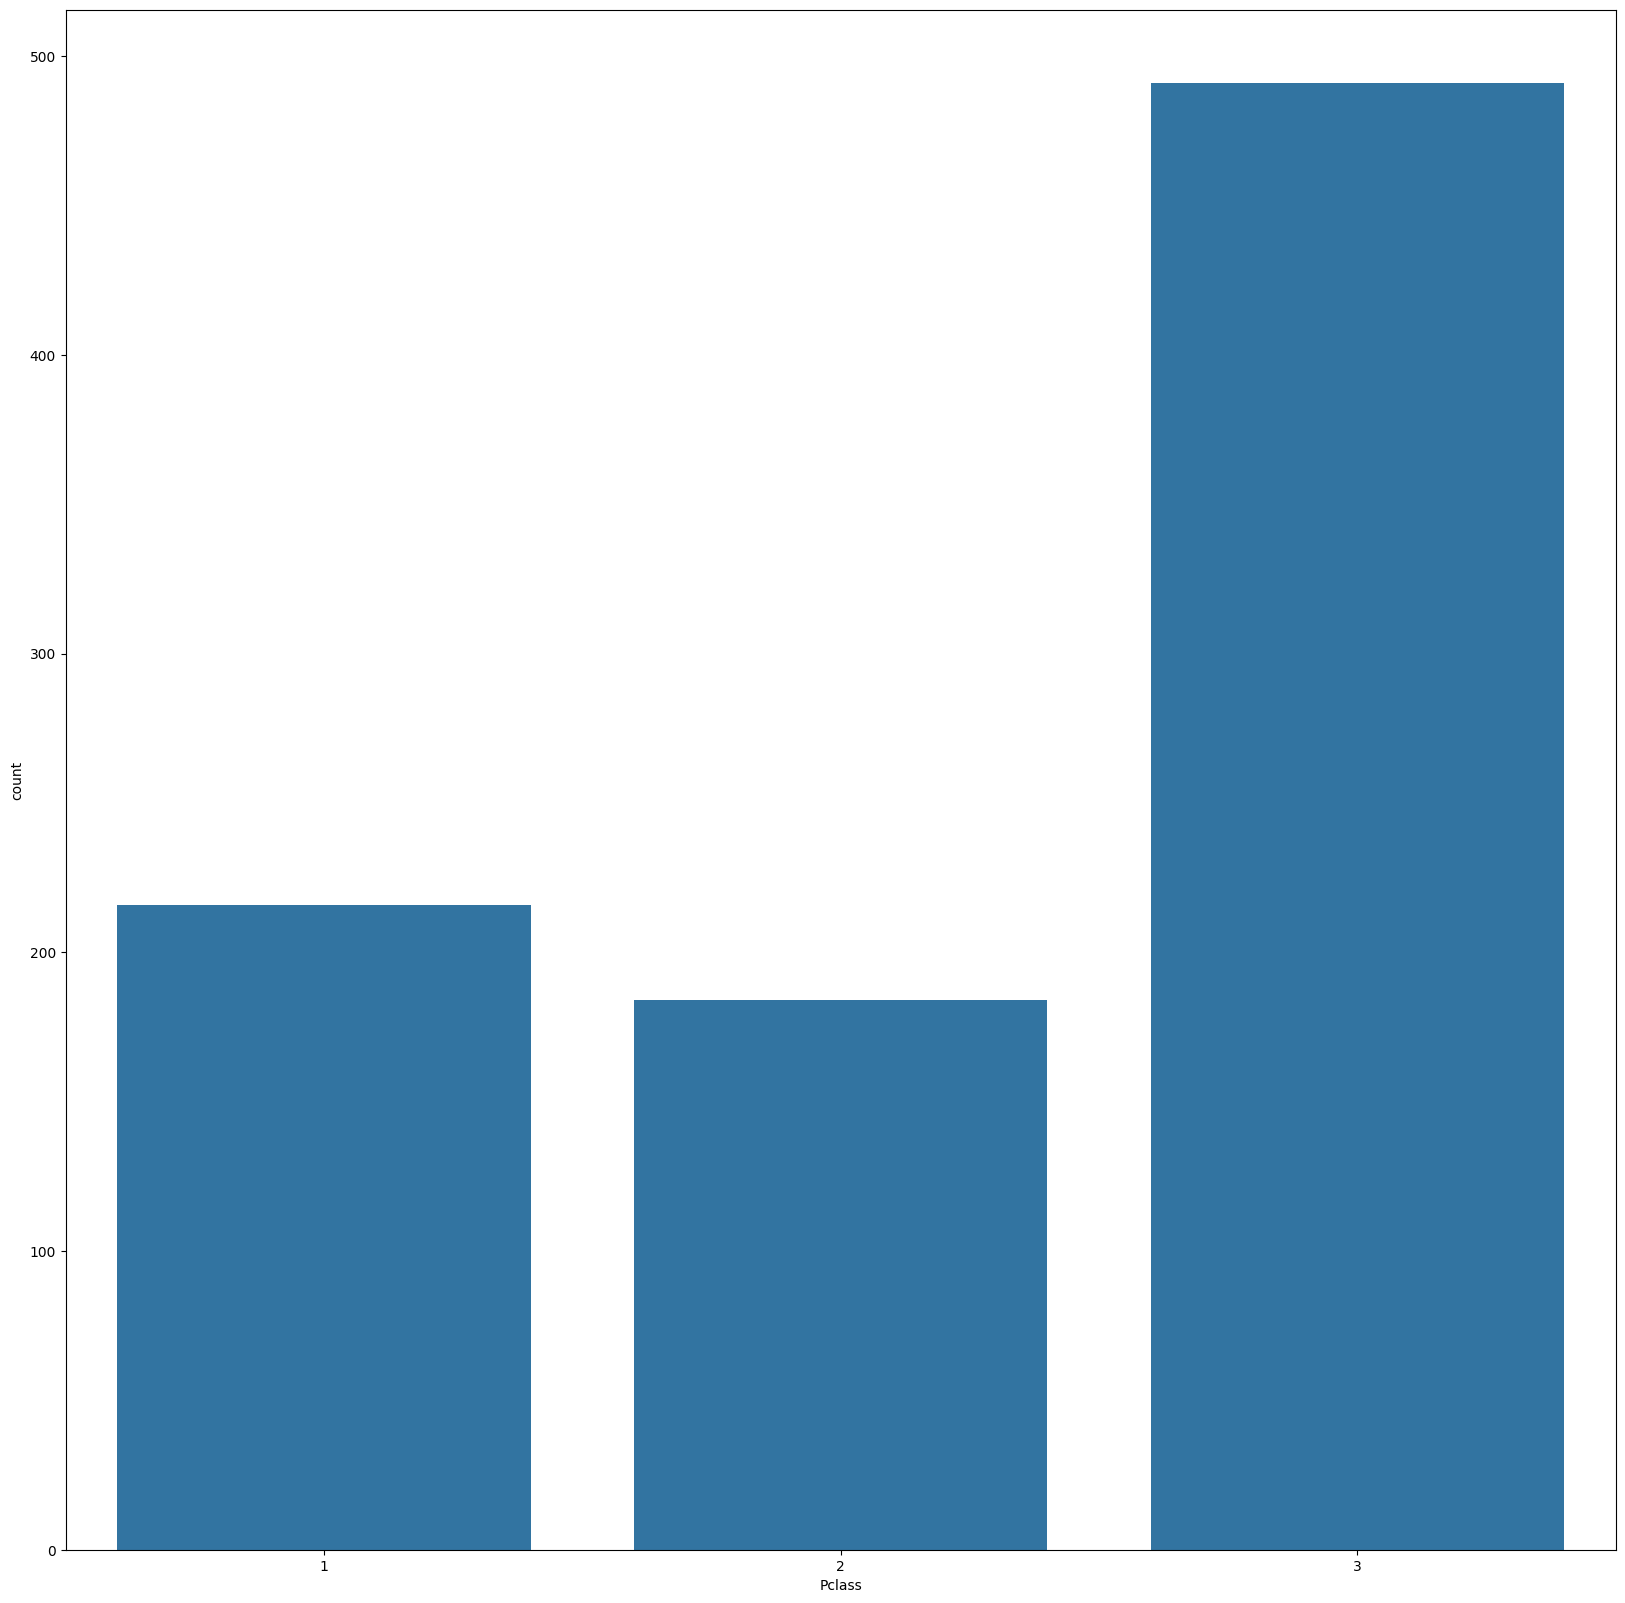

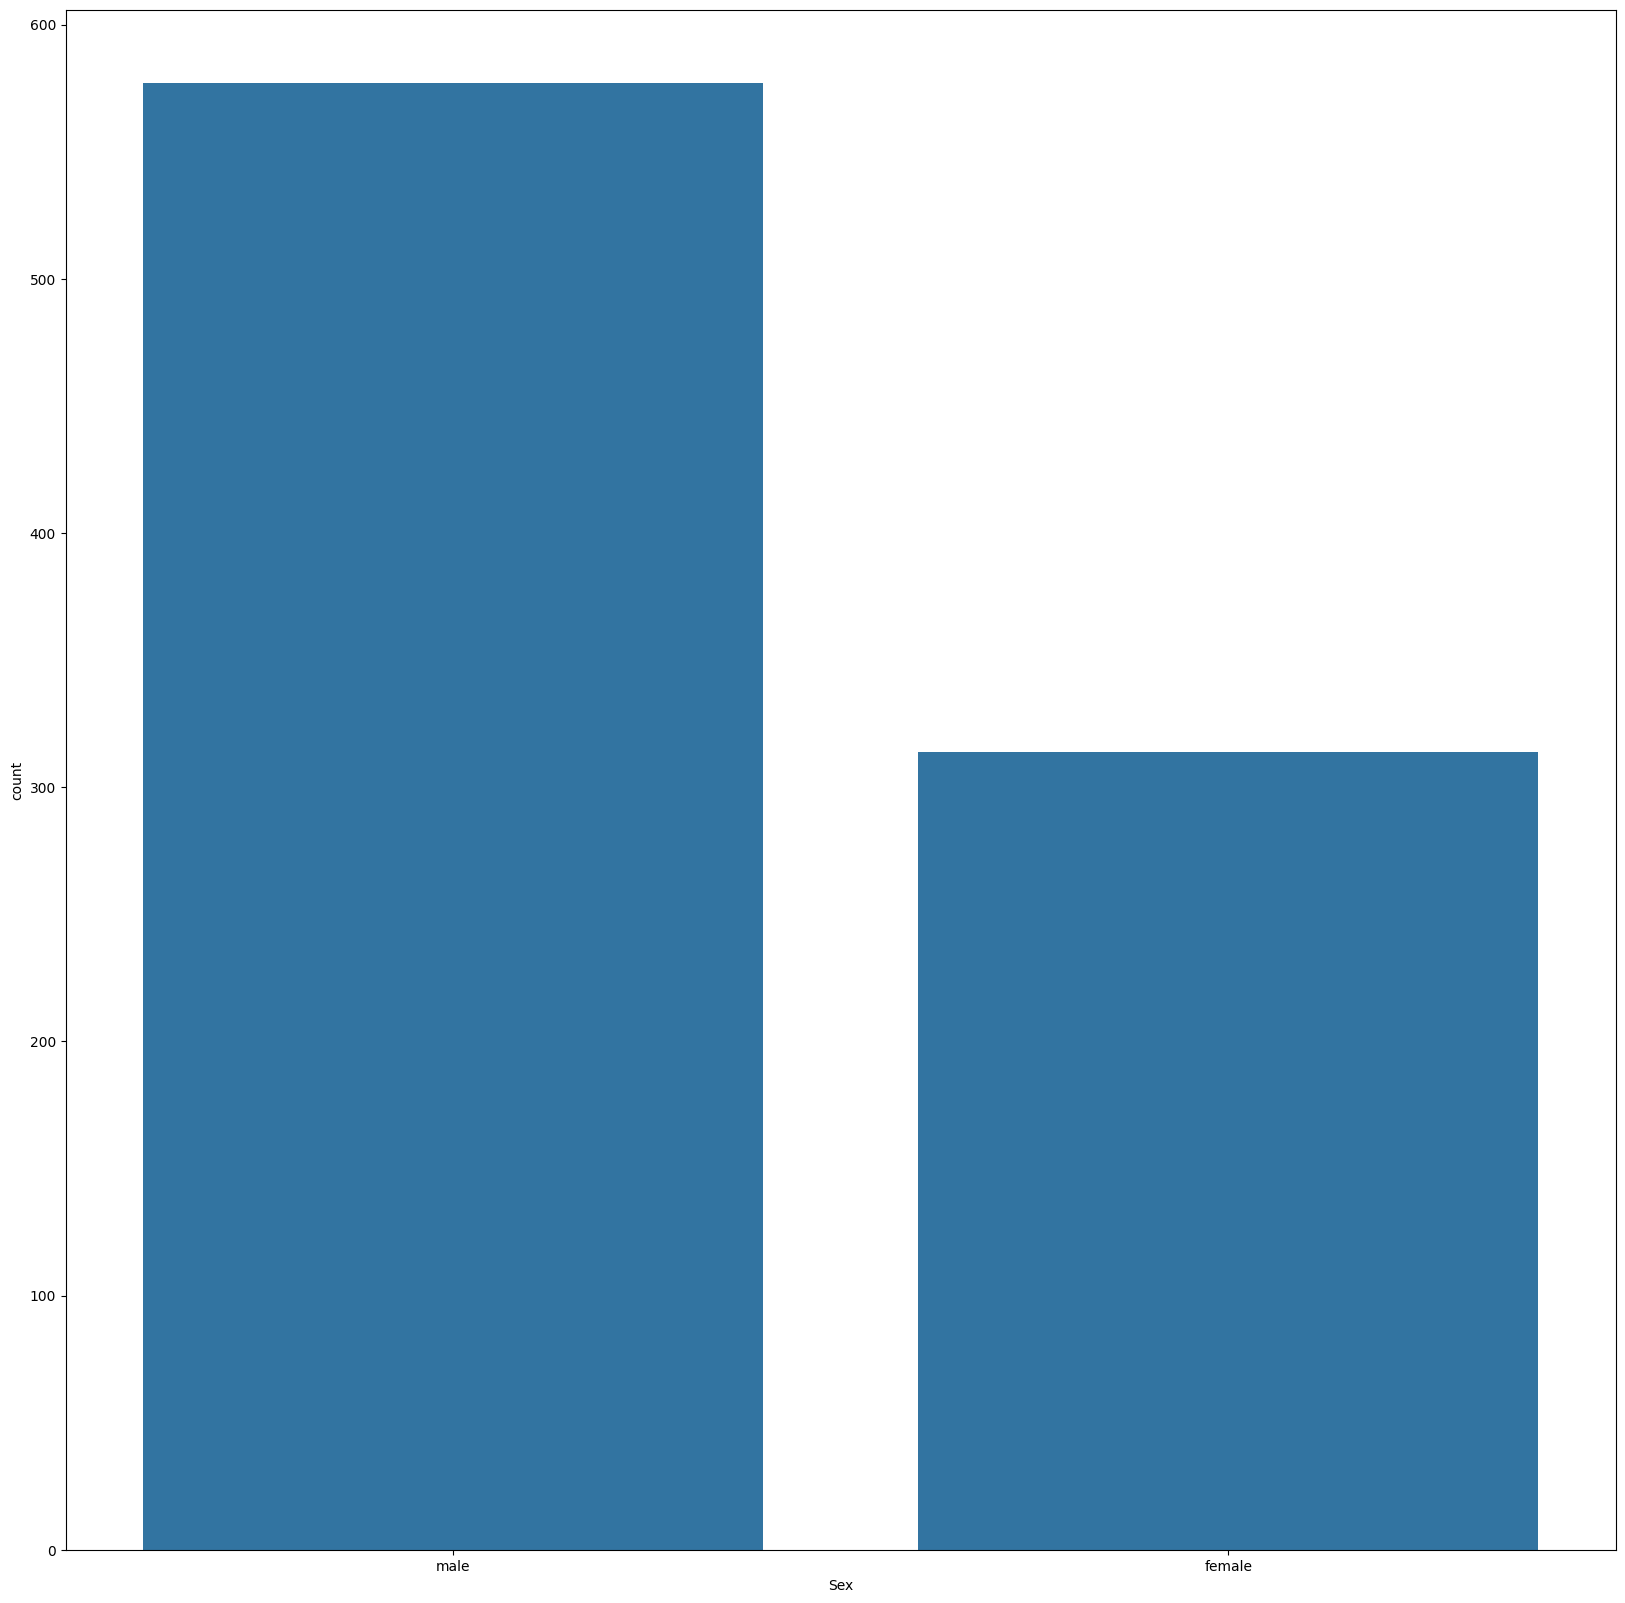

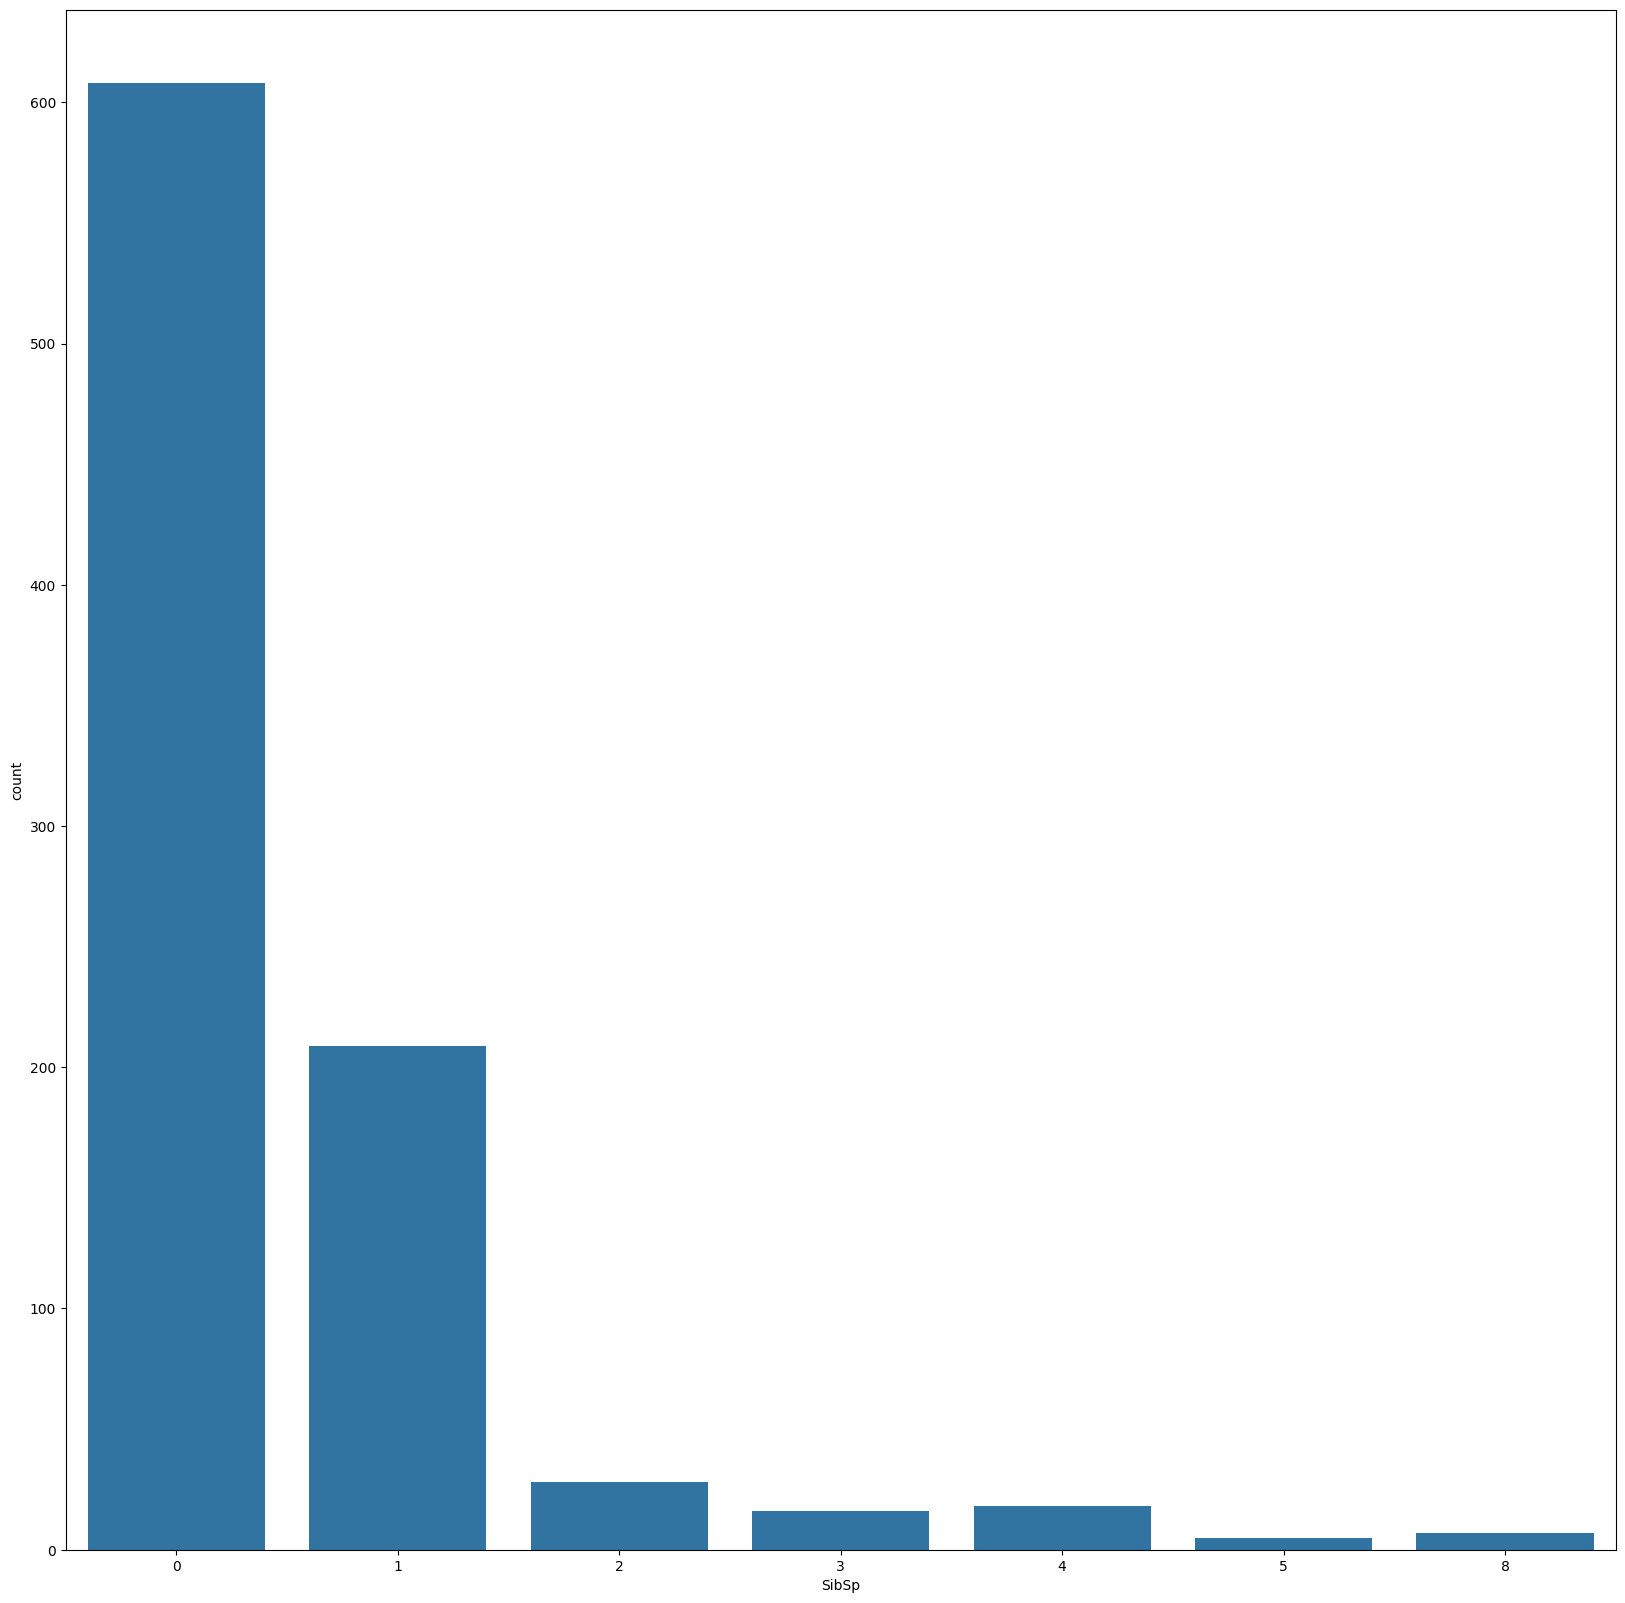

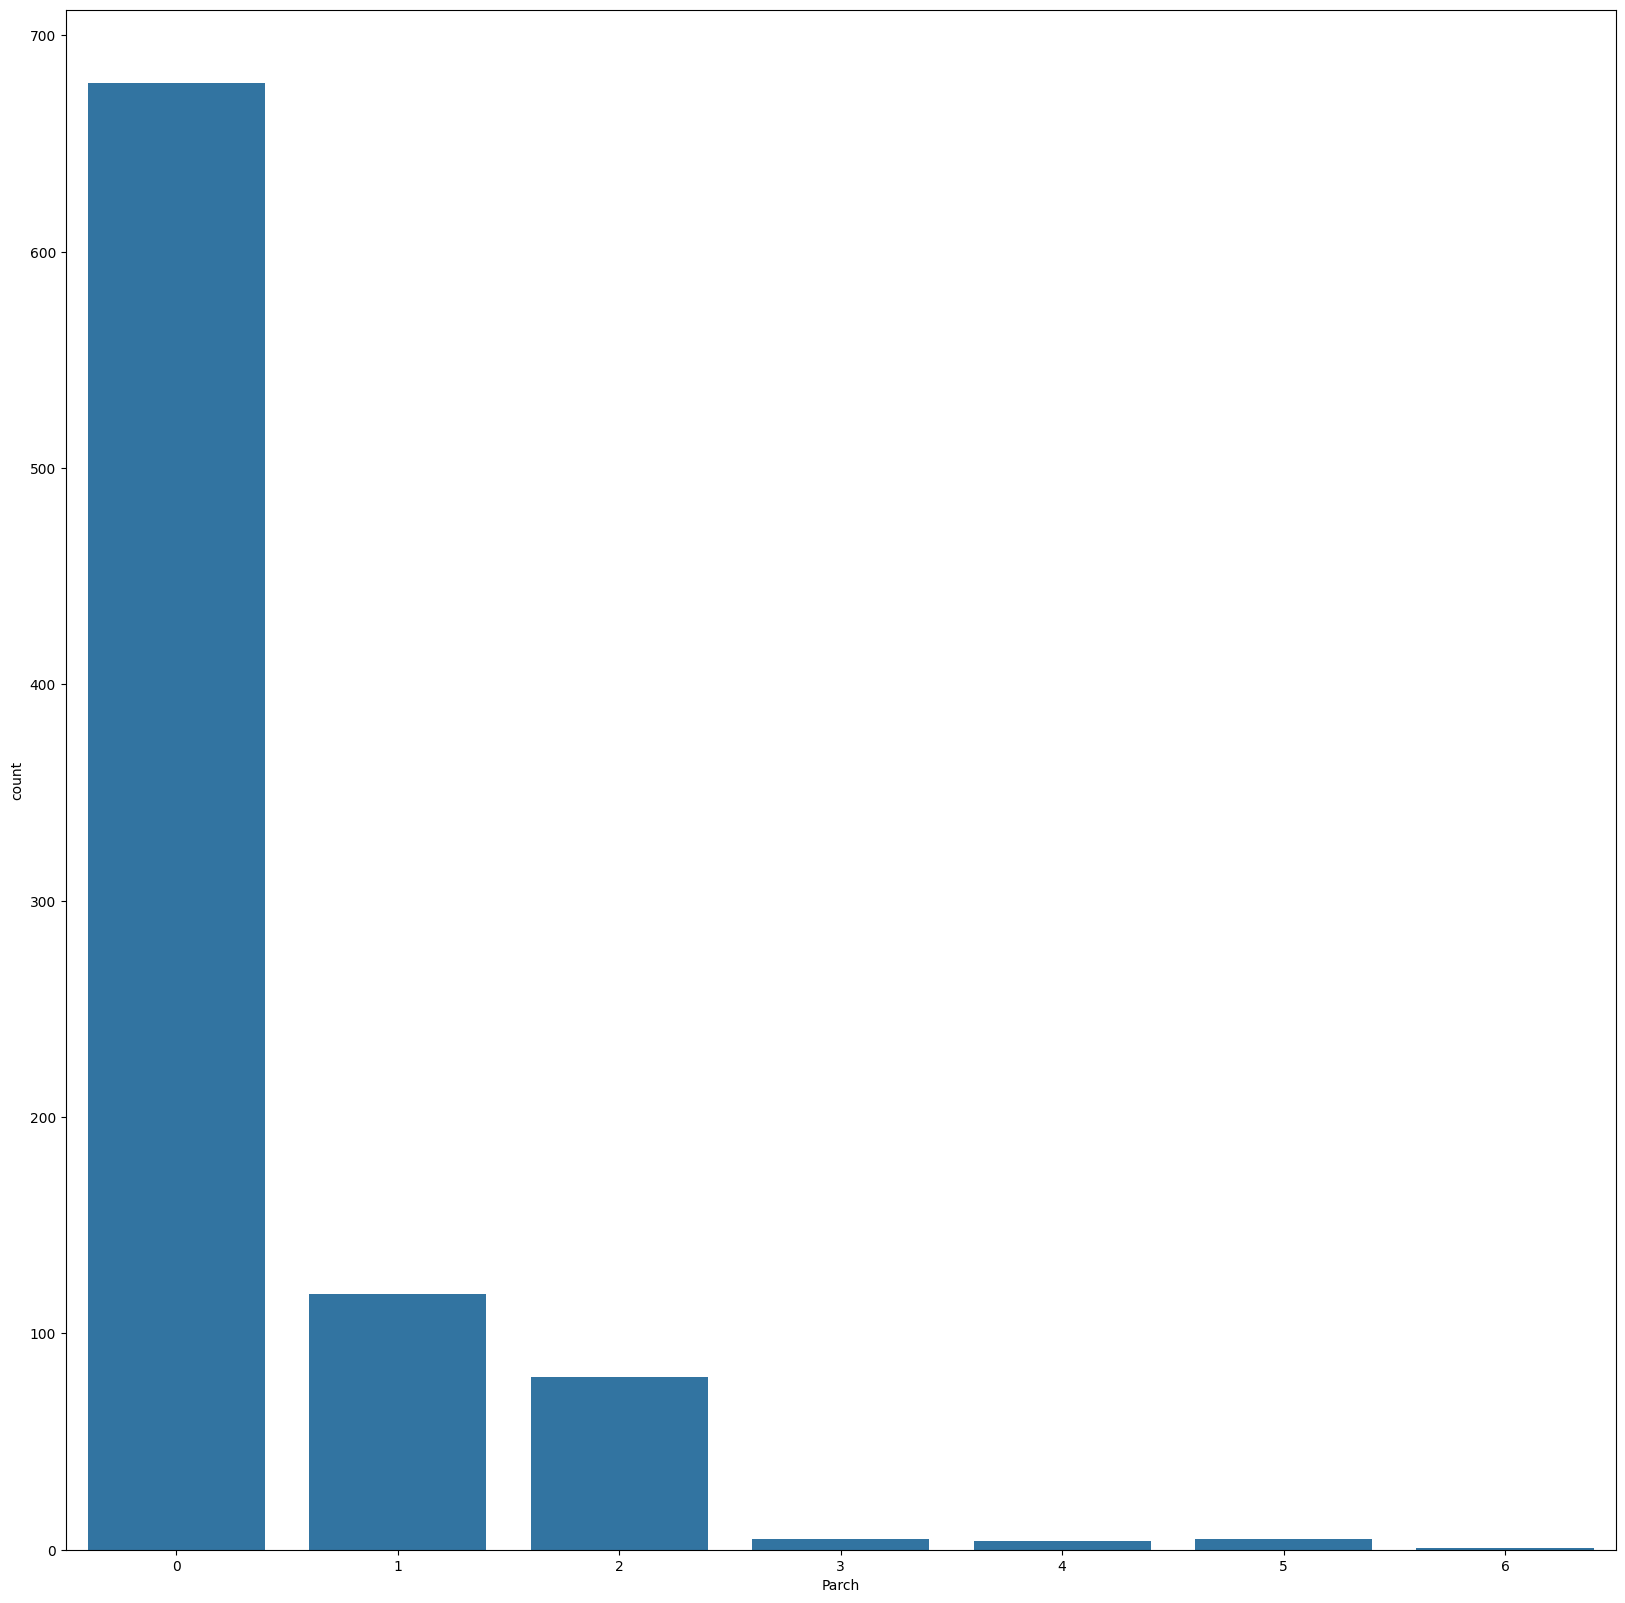

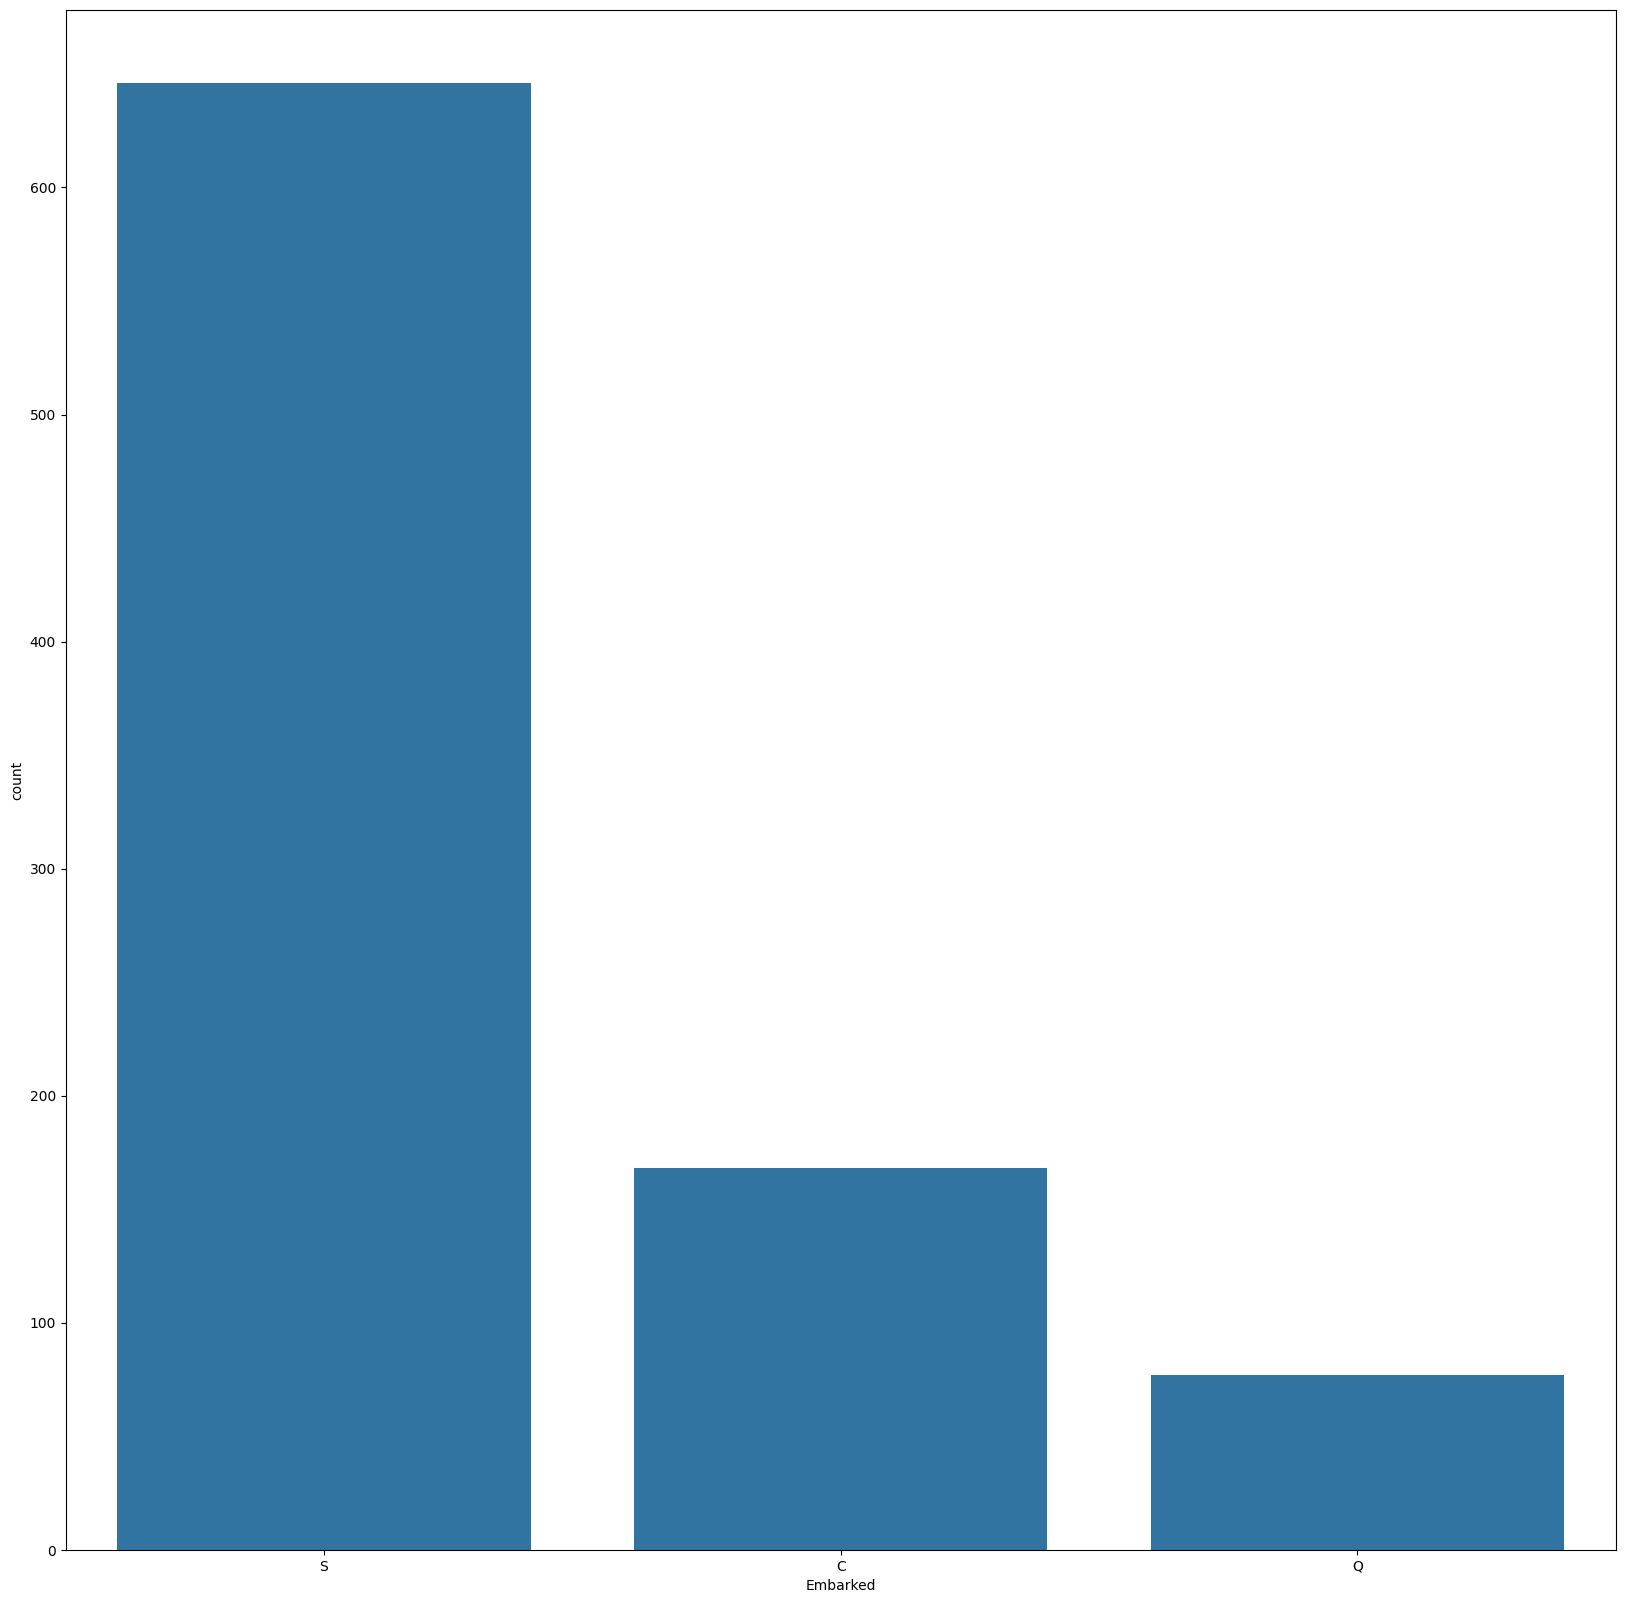

In [46]:
# count plot for categorical data
categorical = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for xc in categorical:
    plt.figure(figsize=(20,20))
    sns.countplot(data=titanic,x=xc)


observations of categorical data distrubition 
Most passengers did not survive. 🚢
The most common class was 3rd class. 🎟️
The majority of passengers were male. 👨
Most passengers traveled without siblings or parents. 👤
Most passengers embarked from Southampton port. ⚓

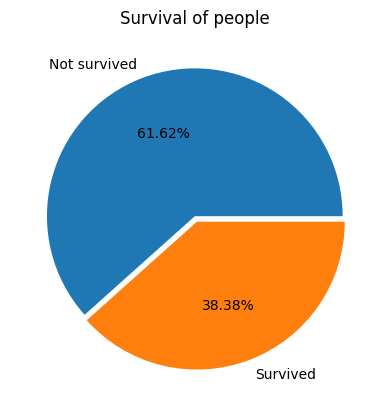

In [65]:
plt.pie(titanic['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived','Survived'],)
plt.title("Survival of people")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

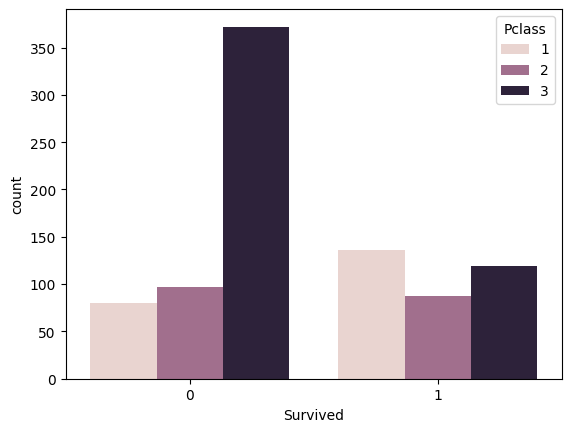

In [48]:
sns.countplot(data=titanic,x='Survived',hue='Pclass')

Most unsurvived was in class 3
Most survived was in class 1

<Axes: xlabel='Survived', ylabel='count'>

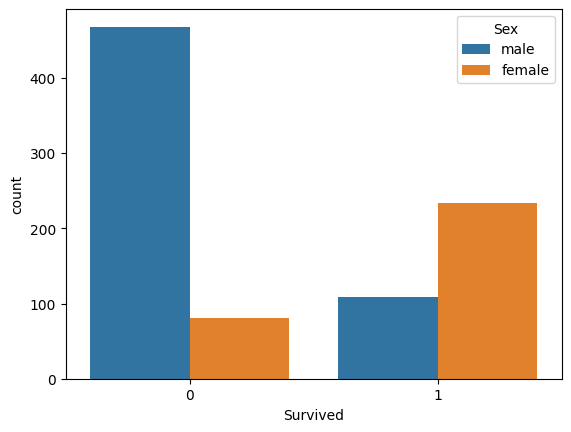

In [49]:
sns.countplot(data=titanic,x='Survived',hue='Sex')

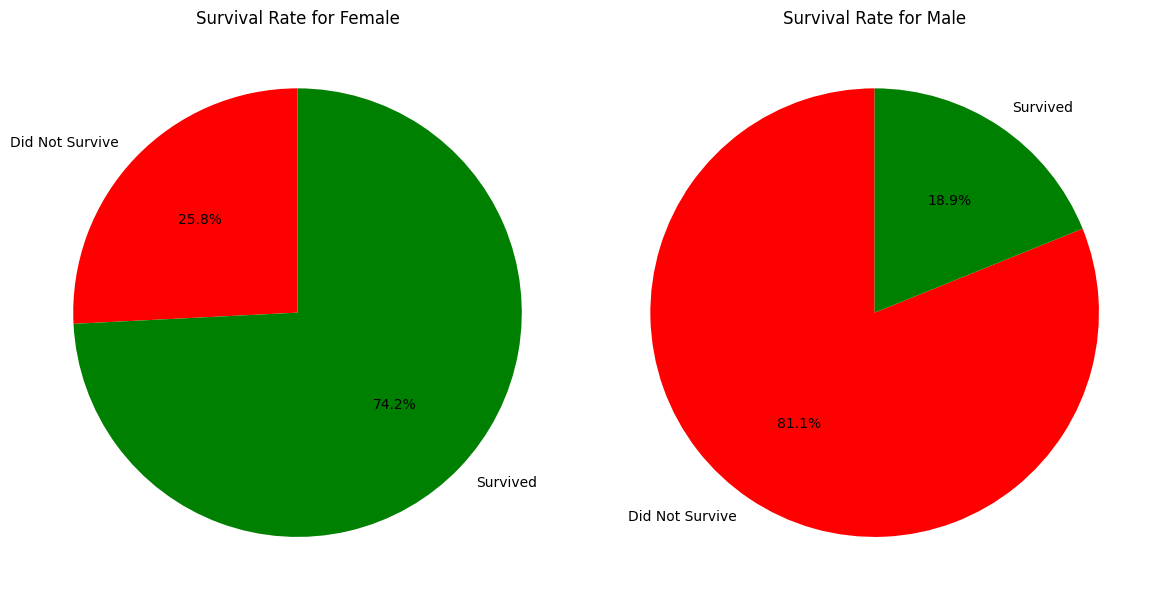

In [50]:

survival_gender = titanic.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(survival_gender.index):
    axes[i].pie(
        survival_gender.loc[gender], 
        labels=['Did Not Survive', 'Survived'], 
        autopct='%1.1f%%', 
        colors=['red', 'green'],
        startangle=90
    )
    axes[i].set_title(f'Survival Rate for {gender.capitalize()}')

plt.tight_layout()
plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

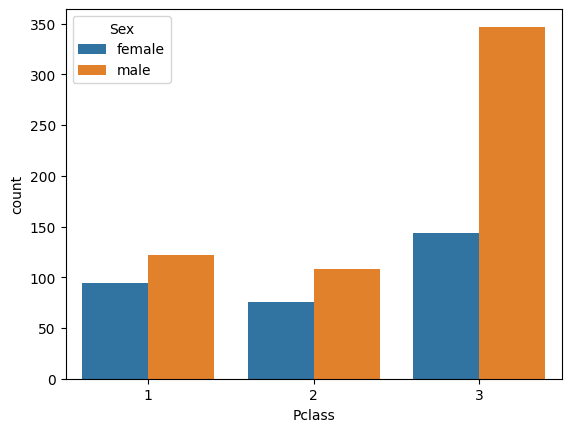

In [51]:
sns.countplot(data=titanic,x="Pclass",hue='Sex')

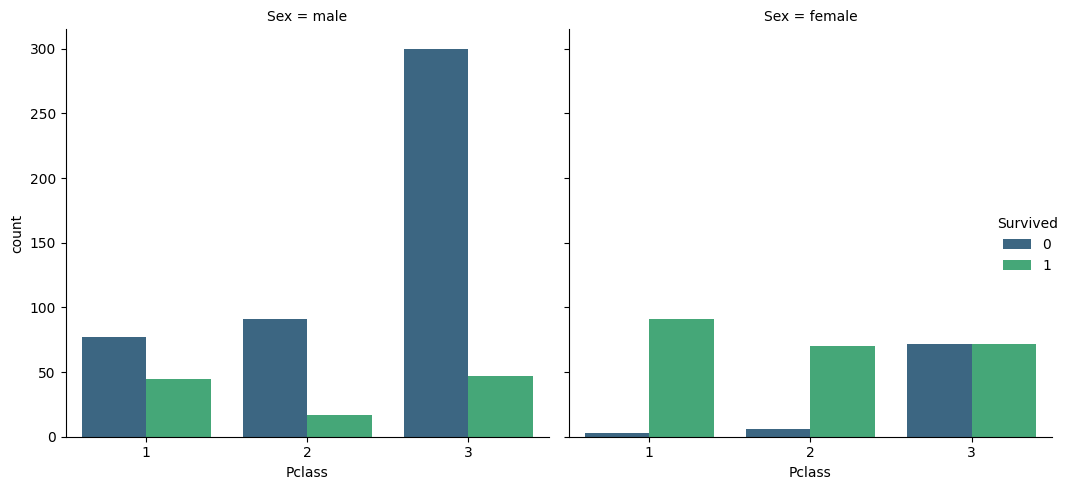

In [52]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data =titanic,palette='viridis' )
plt.tight_layout()

🔹 Observation on Gender and Survival**  

1. **Most females survived** because the majority were in **1st and 2nd class**, where survival rates were higher. 👩‍🚢  
2. **In 3rd class, the survival rate for females was balanced**, with nearly equal numbers of survivors and non-survivors. ⚖️  
3. **For males, the trend was reversed**—most did not survive, especially in 3rd class. 👨🚢  


<Axes: xlabel='Pclass', ylabel='count'>

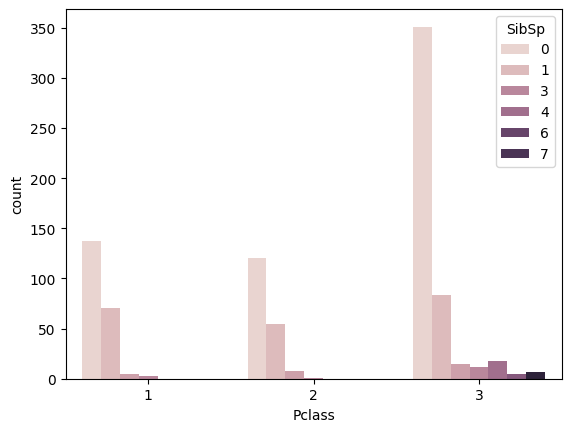

In [53]:
sns.countplot(data=titanic,x="Pclass",hue='SibSp')

<Axes: xlabel='Pclass', ylabel='count'>

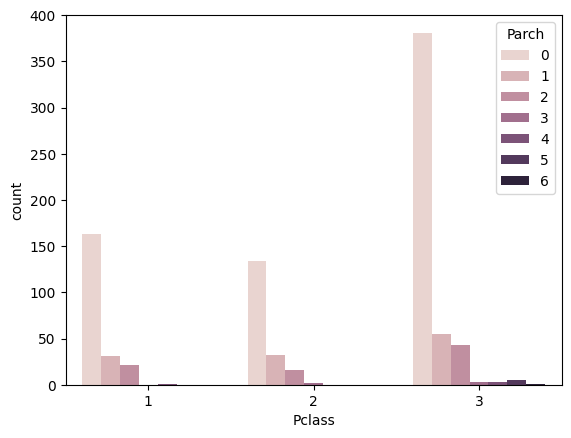

In [54]:
sns.countplot(data=titanic,x="Pclass",hue='Parch')

C:\Users\EGYPT_LAPTOP\AppData\Local\Temp\ipykernel_9640\3713402878.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x='SibSp', y='Survived', ci=None,palette='viridis')
C:\Users\EGYPT_LAPTOP\AppData\Local\Temp\ipykernel_9640\3713402878.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=titanic, x='SibSp', y='Survived', ci=None,palette='viridis')


<Axes: xlabel='SibSp', ylabel='Survived'>

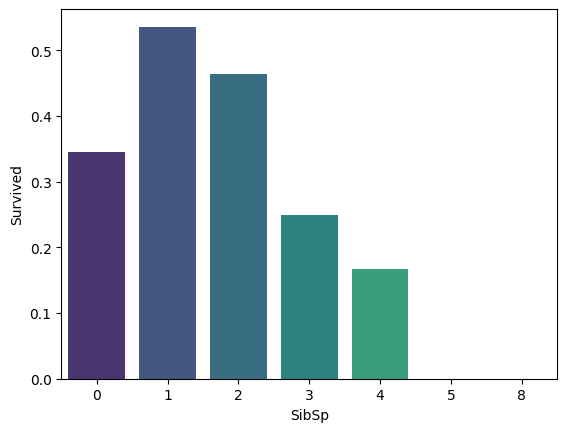

In [55]:
sns.barplot(data=titanic, x='SibSp', y='Survived', ci=None,palette='viridis')


🔹 Observation on Siblings and Survival
Passengers with 1 or 2 siblings had a higher probability of survival. 👨‍👩‍👧
As the number of siblings increased, the probability of survival decreased. 📉
Passengers with many siblings had a greater likelihood of not surviving. 🚢

<Axes: xlabel='Survived', ylabel='Age'>

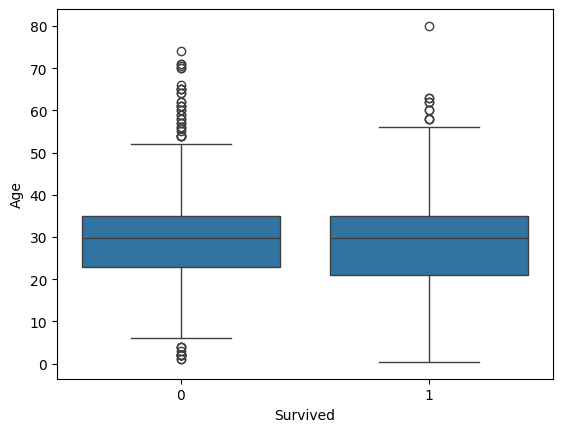

In [56]:
sns.boxplot(data=titanic,x='Survived',y='Age')

In [57]:
titanic2 =titanic[(titanic['Age']>50)|(titanic['Age']<10)]


In [58]:
titanic2['Age_Category'] = titanic2['Age'].apply(lambda x: '>50' if x > 50 else '<10')
print(titanic2['Age_Category'].value_counts())

Age_Category
>50    64
<10    62
Name: count, dtype: int64


C:\Users\EGYPT_LAPTOP\AppData\Local\Temp\ipykernel_9640\3453226005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic2['Age_Category'] = titanic2['Age'].apply(lambda x: '>50' if x > 50 else '<10')


<Axes: xlabel='Survived', ylabel='count'>

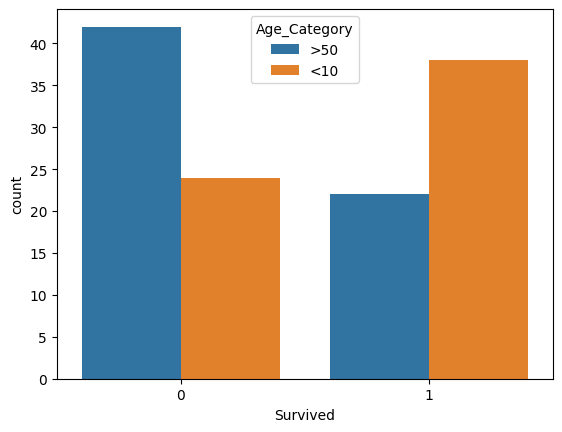

In [59]:
sns.countplot(data=titanic2,x='Survived',hue="Age_Category")

🔹 Observation on Age and Survival 
Most children survived. 👶✅
Most seniors did not survive. 👴❌

In [60]:
def classify_age(age):
    if age < 12:
        return 'Child'
    elif age < 18:
        return 'Teenager'
    elif age < 30:
        return 'Young Adult'
    elif age < 50:
        return 'Adult'
    else:
        return 'Senior'

titanic['Age_Group'] = titanic['Age'].apply(classify_age)


<Axes: xlabel='Age_Group', ylabel='count'>

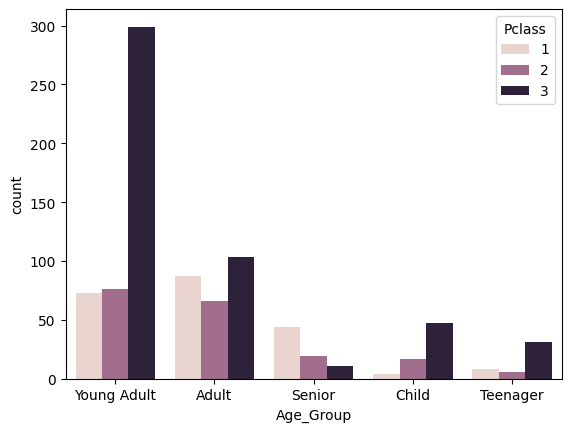

In [61]:
sns.countplot(data=titanic,x='Age_Group',hue="Pclass")

<Axes: xlabel='Survived', ylabel='count'>

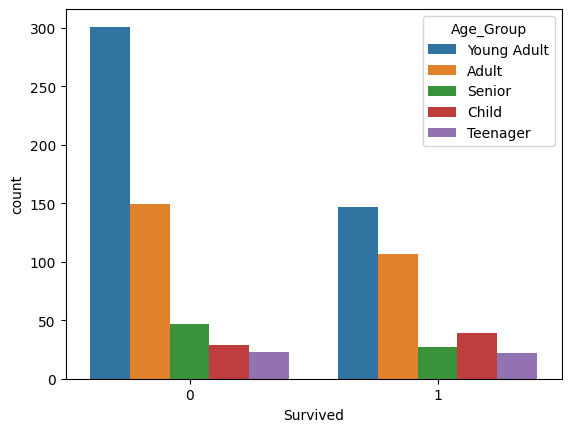

In [62]:
sns.countplot(data=titanic,x='Survived',hue="Age_Group")

🔹 Observation on Young Adults and Survival
The highest density of young adults was in 3rd class. 🎟️
Young adults made up the largest portion of total passengers. 👥
As a result, they had the highest number of non-survivors across all groups. 🚢❌

C:\Users\EGYPT_LAPTOP\AppData\Local\Temp\ipykernel_9640\494976047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex':{'male':1,'female':0}},inplace=True)


<Axes: >

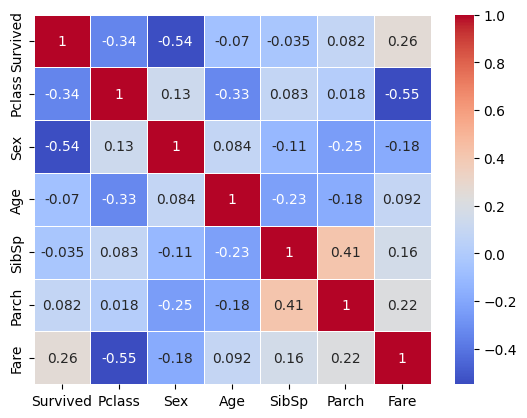

In [63]:
titanic.replace({'Sex':{'male':1,'female':0}},inplace=True)
titanic_corr = titanic.select_dtypes(include=['number']).drop(columns=['PassengerId'], errors='ignore').corr()
sns.heatmap(titanic_corr, linewidth=0.5, annot=True, cmap='coolwarm')

Fare, sex, Pclass has correlation with survived column

<Axes: xlabel='Survived', ylabel='count'>

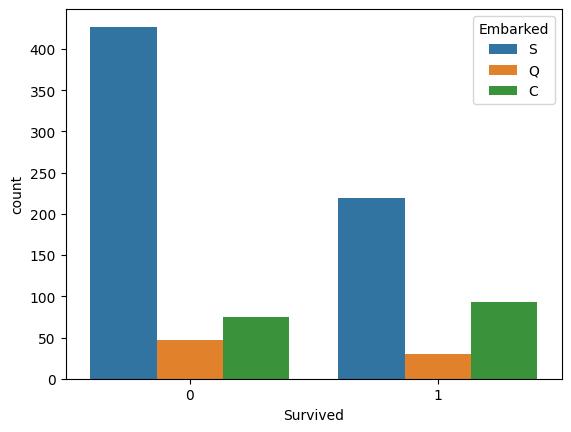

In [64]:
sns.countplot(data=titanic,x="Survived",hue="Embarked")

🔹 Observation on Embarkation and Survival
Southampton was the port where most passengers embarked. ⚓
Since it had the largest number of passengers, it also had the highest number of non-survivors. 🚢❌